# Übung 5

**Gruppenname: TSRI**

- Christian Rene Thelen @cortex359
- Leonard Schiel @leo_paticumbum
- Marine Raimbault @Marine Raimbault
- Alexander Ivanets @sandrium

### In dieser Übung ...

werden Sie einen echten Datenfall bearbeiten, der die Firma Tesla betrifft. In diesem Fall werden Sie sich mit dem Thema *Datenaufbereitung* und dessen Konsequenzen beschäftigen. Nach dieser Aufgabe werden Sie sich noch einmal mit explorativer Analyse und Zusammenhangsmaßen (wie beispielsweise der *Mutual Information*) beschäftigen.

### 5.1 Der Fall Tesla: Autopilot

* In diesem Datenfall üben Sie Ihre Fähigkeiten, Datensätze zu erschließen, aufzubereiten und auf Plausibilität zu prüfen.

Seit wenigen Jahren verstärken verschiedene Unternehmen und Startups ihre Bemühungen, autonome Fahrzeuge zu entwickeln. Solche selbststeuerenden Fahrzeuge versprechen eine Vielzahl neuer Anwendungen und haben das Potenzial, unser Verhältnis zu Autos zu verändern. Manche Visionäre sprechen bereits von "mobility as a service", bei der Autos nicht mehr besessen, sondern per App für eine Fahrt geliehen werden und selbstständig fahren.

Bei der Entwicklung von autonomen Fahrzeugen verfolgen verschiedene Hersteller eine schrittweise Strategie, nach der Assistenzfunktionen zum Parken oder für das Halten der Fahrspur nach und nach den Fahrern zur Verfügung gestellt werden. Tesla stellt den sogenannten *Autopilot* bereit, der das Feature *Autosteer* zum automatischen Halten der Fahrspur enthält.

[Im Jahr 2016 verunglückte Joshua Brown](https://www.nytimes.com/2016/07/02/business/joshua-brown-technology-enthusiast-tested-the-limits-of-his-tesla.html) in Florida in einem Tesla Model S, während das Autosteer Feature aktiviert war. Er war damit der erste (soweit bekannte) Todesfall, der in einem selbstfahrenden Auto eingetreten ist.

Die NHTSA, eine Bundesbehörde der USA im Bereich des Verkehrsministeriums, untersuchte den Fall und forderte Zahlen von Tesla an, die die Sicherheit des Autosteering Features belegen sollten. Anhand dieser Zahlen konnte die Behörde im Jahr 2017 folgende Feststellung machen:

![Abbildung](tesla_autosteer_nhtsa.png)

Die Anzahl der Airbag-Auslösungen dient dabei als ein Anhaltspunkt für die Anzahl der Unfälle. Dieser Auswertung zufolge reduziert *Autosteer* die Unfallwahrscheinlichkeit um 40%!

Der dieser Statistik zugrundeliegende Datensatz wurde aufgrund eines Antrags basierend auf dem Informationsfreiheitsgesetz der USA (Freedom of Information Act) verfügbar gemacht und steht Ihnen in dieser Übung zur Verfügung.

**Ihre Daten**

* Sie finden die Daten, die Sie für diese Übung benötigen, [hier](https://data.bialonski.de/ds/tesla.xlsx).


Wir werden die folgenden Eigenschaften [1-6] untersuchen:

1. Kilometerstand (in Meilen) bevor der Installation von Autosteer ("1l Previous Mileage before Autosteer Install").

   * Dieser Wert wurde abgelesen vor Installation von Autosteer.


2. Kilometerstand (in Meilen) nach der Installation von Autosteer ("1l Next Mileage after Autosteer Install")

   * Dieser Wert wurde abgelesen nach Installation von Autosteer.
   
   
3. Gefahrene Meilen vor Autosteer-Installation ("Miles before Autosteer")

   * Dieser Wert wurde von Tesla so angegeben.


4. Gefahrene Meilen nach Autosteer Installation ("Miles after Autosteer")

   * Dieser Wert wurde von Tesla so angegeben.


5. Airbag-Auslösungen vor Autosteer-Installation ("Airbag events before Autosteer")

   * Dieser Wert wurde von Tesla so angegeben.


6. Airbag-Auslösungen nach Autosteer-Installation ("Airbag events after Autosteer")

   * Dieser Wert wurde von Tesla so angegeben.


**Ihre Aufgaben**

Für die nachfolgenden Aufgaben benötigen Sie Ihre Neugier und etwas detektivisches Gespür.

(1) Betrachten Sie zunächst mit einer Tabellenkalkulation den oben hinterlegten Datensatz. Suchen Sie nach den oben erwähnten sechs Eigenschaften. 

   * Importieren Sie nun mithilfe von Pandas die oben sechs erwähnten Eigenschaften aus der Excel-Datei. Dabei kann es hilfreich sein, das entsprechende Sheet der Excel-Datei in Pandas anzugeben, aus dem Sie die Daten importieren müssen.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
tesla: pd.DataFrame = pd.read_excel("tesla.xlsx", sheet_name="PE16_007_PRODUCTION DATA", usecols=['1l Previous Mileage before Autosteer Install', '1l Next Mileage after Autosteer Install',  'Miles before Autosteer', 'Miles after Autosteer', 'Airbag events before Autosteer', 'Airbag events after Autosteer'], skipfooter=4).dropna(how="all")
tesla.shape

(43781, 6)

(2) Von wie vielen Fahrzeugen wurden Daten erhoben? Nennen Sie die Anzahl der Fahrzeuge, indem Sie sie aus Ihren Daten aus Teilaufgabe (1) bestimmen.

43.781 Autos

(3) Reproduzieren Sie die beiden Zahlen der NHTSA Behörde der USA, d.h. berechnen Sie die Anzahl der Airbag-Auslösungen vor Autosteer-Installation pro 1 Million gefahrener Meilen und nach Autosteer-Installation pro 1 Million gefahrener Meilen und geben Sie sie an.

In [2]:
airbag_events_before = tesla['Airbag events before Autosteer'].sum() / (tesla['Miles before Autosteer'].sum() / 1e6)
airbag_events_after = tesla['Airbag events after Autosteer'].sum() / (tesla['Miles after Autosteer'].sum() / 1e6)

print(f"Anzahl der Airbag-Auslösungen vor Autosteer-Installation: {airbag_events_before:2.4f} pro 1 Million gefahrener Meilen.")
print(f"Anzahl der Airbag-Auslösungen nach Autosteer-Installation: {airbag_events_after:1.4f} pro 1 Million gefahrener Meilen.")

Anzahl der Airbag-Auslösungen vor Autosteer-Installation: 1.3274 pro 1 Million gefahrener Meilen.
Anzahl der Airbag-Auslösungen nach Autosteer-Installation: 0.8140 pro 1 Million gefahrener Meilen.


(4) Bis hierher stimmen unsere Analysen mit der US-Behörde überein. Doch es gibt Ungereimtheiten in den Daten. Betrachten Sie dazu die Datenreihen 1 und 2, d.h. die Kilometerstände (in Meilen) der Fahrzeuge vor und nach der Installation von Autosteer. Vor der Installation von Autosteer wird der Kilometerstand erhoben; nach der Installation von Autosteer wird der Kilometerstand erhoben:

1. Welche Erwartungshaltung haben Sie an die beiden Datensätze? (1 Satz)

2. Explorieren Sie diese beiden Datensätze (Stichwort: Explorative Analyse). Was fällt Ihnen auf? (1 Satz)

Wenn Sie partout nicht mehr weiter kommen, gebe ich Ihnen einen Tipp: Wenn Sie vor der Installation von Autosteer den Kilometerstand abschreiben würden, und nach der Installation ebenfalls den Kilomesterstand notieren, würden sich die beiden Kilometerstände unterscheiden oder sollten sie gleich sein?

Die Erwartung ist, 
- dass die Installation von Autosteer nicht oder nicht viel an der Fahrzeugnutzung Meilen/Zeit ändert. 
- dass der Kilometerstand sich durch die Installation von Autosteer in der Werkstatt nicht ändert.

In [3]:
tesla[['1l Previous Mileage before Autosteer Install', '1l Next Mileage after Autosteer Install']].describe()

,1l Previous Mileage before Autosteer Install,1l Next Mileage after Autosteer Install
count,43699.000000,43556.000000
mean,1482.599991,4555.421917
std,3698.902472,6164.083570
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,2130.000000
75%,245.000000,7052.000000
max,57627.000000,97066.000000


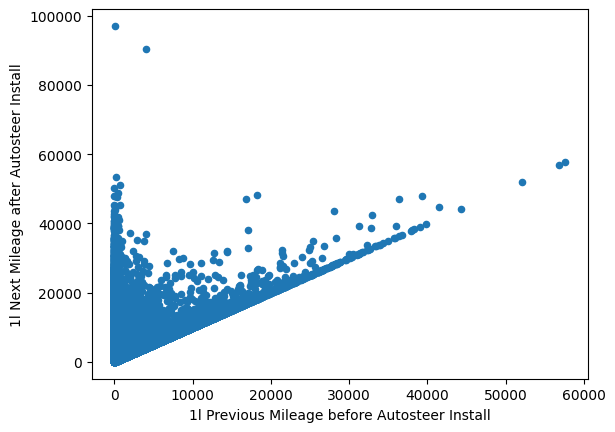

In [4]:
tesla.plot(x='1l Previous Mileage before Autosteer Install', y='1l Next Mileage after Autosteer Install', kind="scatter")
plt.show()

Eigentlich würden wir hier eine Gerade erwarten, da nicht davon auszugehen ist, dass sich der Kilometerstand bei der Installation ändert.

(5) Problem 1: Identifizieren Sie anhand Ihrer Beobachtungen aus Schritt (4) die Fahrzeuge, bei denen Sie genau feststellen konnten, zu welchem Kilometerstand Autosteer tatsächlich installiert worden sein muss. Betrachten Sie **nur** die Fahrzeuge aus dieser Menge, für die tatsächlich gefahrenen Kilometer (mehr als 0) vor der Autosteer-Installation ausgewiesen wurden.

* Wie viele Fahrzeuge erfüllen die gerade genannten Kriterien?
* Bestimmen Sie die Anzahl der Airbag-Auslösungen pro gefahrenen 1 Million Meilen vor und nach der Installation von Autosteer. Geben Sie diese Zahlen an. Was stellen Sie fest? 
* Vergleichen Sie Ihre Zahlen mit den oben angegebenen Zahlen der NHTSA. Sehen Sie gleiche oder unterschiedliche Tendenzen?

In [5]:
subset = tesla[(tesla['Miles before Autosteer'] > 0.0) & (tesla['1l Previous Mileage before Autosteer Install'] == tesla['1l Next Mileage after Autosteer Install'])]
print(f"Fahrzeuge, bei denen die Kriterien übereinstimmen: {len(subset)}")

events_before_autosteer_per_mile = subset["Airbag events before Autosteer"].sum() / (subset["Miles before Autosteer"].sum() / 1e6)
events_after_autosteer_per_mile = subset["Airbag events after Autosteer"].sum() / (subset["Miles after Autosteer"].sum() / 1e6)

print(f"Airbag-Auslösungen vor Autosteer: {events_before_autosteer_per_mile}")
print(f"Airbag-Auslösungen nach Autosteer: {events_after_autosteer_per_mile}")

Fahrzeuge, bei denen die Kriterien übereinstimmen: 5719
Airbag-Auslösungen vor Autosteer: 0.7607940388363484
Airbag-Auslösungen nach Autosteer: 1.2504243627681144


(6) Problem 2: Identifizieren Sie anhand Ihrer Beobachtungen aus Schritt (4) die Fahrzeuge, bei denen Sie genau feststellen konnten, zu welchem Kilometerstand Autosteer tatsächlich installiert worden sein muss. Betrachten Sie nun alle Fahrzeuge aus dieser Menge, die **keine gefahrenen Kilometer vor der Autosteer-Installation** aufweisen.

* Wie viele Fahrzeuge erfüllen die gerade genannten Kriterien?
* Wie viele Airbag-Auslösungen vor der Installation von Autosteer beobachten Sie für diese Gruppe von Fahrzeugen?
* Welche Auswirkung hat Ihre Beobachtung auf die Größe der Anzahl an Airbag-Auslösungen pro 1 Million gefahrener Meilen, wie sie die NHTSA berechnet hat?

In [6]:
subset = tesla[(tesla['Miles before Autosteer'] == 0.0)  & (tesla['1l Previous Mileage before Autosteer Install'] == tesla['1l Next Mileage after Autosteer Install'])]
print(f"Fahrzeuge, die keine gefahrenen Kilometer vor der Autosteer-Installation aufweisen: {len(subset)}")

events_before_autosteer = subset["Airbag events before Autosteer"].sum()

print(f"Anzahl der Airbag-Auslösungen vor Autosteer dieser Fahrzeuge: {events_before_autosteer}")

Fahrzeuge, die keine gefahrenen Kilometer vor der Autosteer-Installation aufweisen: 14689
Anzahl der Airbag-Auslösungen vor Autosteer dieser Fahrzeuge: 1.0


(7) Problem 3: Identifizieren Sie anhand Ihrer Beobachtungen aus Schritt (4) die Fahrzeuge, bei denen Sie **nicht** genau feststellen können, zu welchem Kilometerstand Autosteer tatsächlich installiert wurde. Betrachten Sie **nur** die Fahrzeuge aus dieser Menge, für die tatsächlich mehr als 0 gefahrene Kilometer vor der Autosteer-Installation ausgewiesen wurden.

1. Wie viele Autos sind in dieser Menge enthalten? Wie viele Airbag-Auslösungen sind in dieser Menge enthalten?
2. Bestimmen Sie die Gesamtanzahl der gefahrenen Meilen über alle Fahrzeuge dieser Menge, die zwischen dem Kilometerstand vor Autosteer-Installation und nach Autoinstallation gefahren wurden. Dies sind die "Gap"-Meilen, bei denen wir nicht wissen, zu welcher exakten Kilometerstandszahl Autosteer installiert wurde.
3. Bestimmen Sie die Gesamtanzahl aller Meilen dieser Menge, die vor der Autosteer-Installation gefahren wurden. 
4. Vergleichen Sie die Zahlen aus Schritt 7.2 und 7.3: Ist die gefahrene Gesamtmeilenzahl vor Autosteer-Installation deutlich größer oder kleiner als die Gesamtmeilenzahl der "Gap"-Meilen?

Welchen Schluss ziehen Sie für die Validität der NHTSA Untersuchung aus Ihren Beobachtungen aus diesem Schritt? (1-3 Sätze).

In [7]:
subset = tesla[(tesla['Miles before Autosteer'] > 0.0)  & (tesla['1l Previous Mileage before Autosteer Install'] != tesla['1l Next Mileage after Autosteer Install'])]
print(f"Es sind {len(subset)} Fahrzeuge mehr als 0 Meilen vor der Autosteer Installation gefahren, bei denen sich nicht feststellen ließ, wann Autosteer tatsächlich installiert wurde.")

gap_miles = subset["1l Next Mileage after Autosteer Install"] - subset["1l Previous Mileage before Autosteer Install"]
print(f"Gap Miles = {gap_miles.sum():23.1f}")
print(f"Miles before Autosteer = {subset['Miles before Autosteer'].sum()}")

Es sind 8920 Fahrzeuge mehr als 0 Meilen vor der Autosteer Installation gefahren, bei denen sich nicht feststellen ließ, wann Autosteer tatsächlich installiert wurde.
Gap Miles =              57955464.0
Miles before Autosteer = 22726819.0


Die Anzahl der "Gap"-Meilen ist mehr als doppelt so groß wie die Anzahl der in die NHTSA Rechnung einbezogenen Meilen vor der Autosteer Installation.  

(8) Problem 4: Identifizieren Sie anhand Ihrer Beobachtungen aus Schritt (4) die Fahrzeuge, bei denen Sie **nicht** genau feststellen können, zu welchem Kilometerstand Autosteer tatsächlich installiert wurde. Betrachten Sie **nur** die Fahrzeuge aus dieser Menge, für die nur 0 gefahrene Kilometer vor der Autosteer-Installation ausgewiesen wurden.

1. Wie viele Autos sind in dieser Menge enthalten?
2. Wie viele Airbag-Auslösungen können Sie vor und nach der Autosteer-Installation feststellen?

Wie deuten Sie Ihre Beobachtungen hinsichtlich der Validität der NHTSA Untersuchung? (1-3 Sätze)

In [8]:
subset = tesla[(tesla['Miles before Autosteer'] == 0.0)  & (tesla['1l Previous Mileage before Autosteer Install'] != tesla['1l Next Mileage after Autosteer Install'])]
print(f"Fahrzeuge, die keine gefahrenen Kilometer vor der Autosteer-Installation aufweisen und bei denen der Installationszeitpunkt nicht genau festgestellt werden kann: {len(subset)}")

events_before_autosteer = subset["Airbag events before Autosteer"].sum()
events_after_autosteer = subset["Airbag events after Autosteer"].sum()

print(f"Anzahl der Airbag-Auslösungen vor Autosteer dieser Fahrzeuge: {events_before_autosteer}")
print(f"Anzahl der Airbag-Auslösungen nach Autosteer dieser Fahrzeuge: {events_after_autosteer}")

Fahrzeuge, die keine gefahrenen Kilometer vor der Autosteer-Installation aufweisen und bei denen der Installationszeitpunkt nicht genau festgestellt werden kann: 14452
Anzahl der Airbag-Auslösungen vor Autosteer dieser Fahrzeuge: 17.0
Anzahl der Airbag-Auslösungen nach Autosteer dieser Fahrzeuge: 48.0


(9) Abschluss: Betrachten Sie Ihre Ergebnisse zu Problemen 1-4. Lässt sich aufgrund der vorliegenden Zahlen die Aussage treffen, dass durch Autosteer die Anzahl der Airbag-Auslösungen pro gefahrene 1 Million Meilen zurückgegangen ist und damit das Fahren sicherer geworden ist? Argumentieren Sie in wenigen Sätzen.

https://www.heise.de/autos/artikel/Rechenfehler-Tesla-Autosteer-senkt-Unfallrate-nicht-4303949.html

## 5.2 Multivariate explorative Analyse II (Palmer Pinguine & Parallel Coordinates Plots)

In dieser Übung untersuchen Sie Daten verschiedener Pinguin-Gattungen, die während einer Forschungsmission in der Antarktis an der [Palmer-Station](https://de.wikipedia.org/wiki/Palmer-Station) gesammelt wurden. Der Datensatz stammt aus einer [Publikation](https://doi.org/10.1371/journal.pone.0090081), die das Futtersuchverhalten der Tiere untersuchte. Sie werden die Daten mithilfe von [**Parallel Coordinates Plots**](https://de.wikipedia.org/wiki/Parallele_Koordinaten) (PCPs, ||-Plots) untersuchen. PCPs sind wirkungsvolle Instrumente für eine Exploration höherdimensionaler Räume, die Sie im Rahmen dieser Übung kennenlernen werden. Sie spielen in vielen explorativen Analysen eine Rolle, beispielsweise auch bei der [Parameterexploration](https://web.archive.org/web/20240423104335/https://docs.wandb.ai/guides/app/features/panels/parallel-coordinates) zum Training tiefer neuronaler Netze.

Es begrüßen Sie:

<img src="lter_penguins.png" alt="Palmer Penguins" width="600" style="background-color: white"/>

**Hinweis**

- Für diese Übung müssen Sie die Bibliotheken [hiplot](https://github.com/facebookresearch/hiplot) und [seaborn](https://seaborn.pydata.org/installing.html) installieren, sollten Sie sie noch nicht installiert haben.


(1) Importieren Sie den Datensatz in einen Pandas DataFrame.

- URL des Datensatzes: `https://data.bialonski.de/ds/palmerpenguins.csv`

In [9]:
penguins: pd.DataFrame  = pd.read_csv('palmerpenguins.csv')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0
...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0


(2) Untersuchen Sie den Datensatz und beantworten Sie bitte folgende Fragen:
- Welche Features sind enthalten? 
- Wie viele Datenpunkte gibt es? 
- Wie viele Klassen (`species`) gibt es?
- Wie viele Datenpunkte gibt es pro Klasse?

In [10]:
print(f"Features: {list(penguins.columns)}")
print(f"Datenpunkte: {penguins.shape[0]}")
print(f"Verschiedene Spezies: {penguins['species'].unique()}")
print(f"Datenpunkte pro Spezies:\n{penguins.groupby('species').size()}")

Features: ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
Datenpunkte: 344
Verschiedene Spezies: ['Adelie' 'Gentoo' 'Chinstrap']
Datenpunkte pro Spezies:
species
Adelie       152
Chinstrap     68
Gentoo       124
dtype: int64


(3) Erstellen Sie einen Scatter-Matrix-Plot des oben beschriebenen Datensatzes, **wobei jeder Datenpunkt durch eine Farbe entsprechend der Spezies gekennzeichnet wird**. <br/>
Verwenden Sie dazu die Bibliothek `seaborn` und die Funktion [`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

*Hinweis: `pairplot` interpretiert die numerischen Spalten des Datensatzes automatisch als Features. Aus diesem Grund erscheinen nicht zwingend alle Spalten im Scatter-Matrix-Plot.*

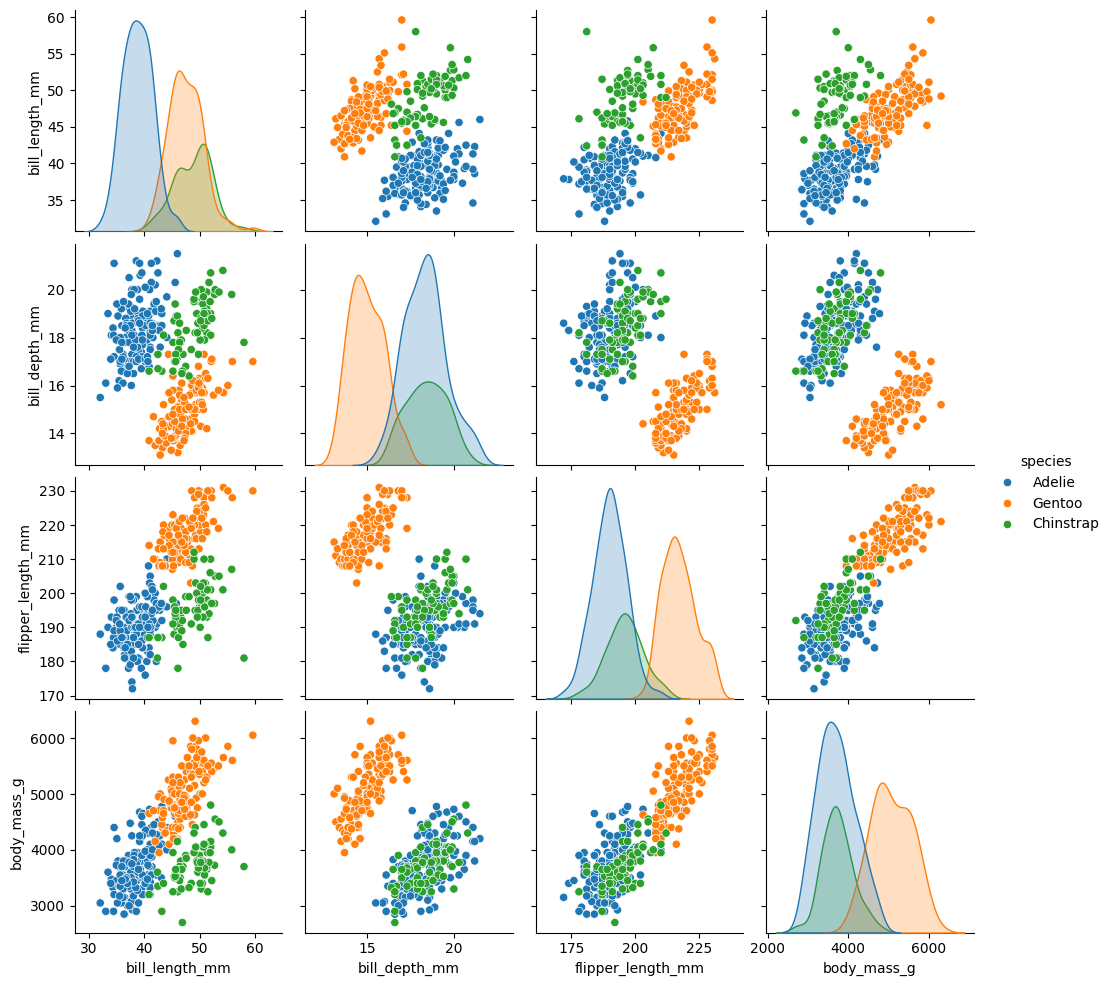

In [11]:
import seaborn as sns
sns.pairplot(penguins, hue='species')
plt.show()

*Falls Sie wissen möchten, was es mit dem sogenannten "Bill" auf sich hat:*

<img src="culmen_depth.png" alt="Palmer Penguins" width="600"/>

(4) Die drei Pinguingattungen erscheinen im Scatter-Matrix-Plot der vorherigen Teilaufgabe als "Punktwolken" (mehr dazu in einer späteren Vorlesungseinheit zum Thema *Clustering*).

- Versuchen Sie nun, die drei Gattungen mithilfe sogenannter "Bounding Boxes" in den Plots zu identifizieren. Suchen Sie dazu nach Featurepaaren, in denen sich die Klassen gut voneinander unterscheiden lassen. Für jede "Bounding Box" benötigen Sie jeweils ein Intervall für die x- und y-Achse, welche die Punktwolke einer Gattung möglichst gut einschließt. 

Fiktives Beispiel:
- Gattung A: `body_mass_g` $\in [3000, 5000]$ und `flipper_length_mm` $\in [170, 200]$

- Gattung Adelie: `bill_depth_mm` $\in [15, 22]$ und `bill_length_mm` $\in [30, 45]$
- Gattung Gentoo: `bill_depth_mm` $\in [12, 18]$ und `bill_length_mm` $\in [40, 55]$
- Gattung Gentoo: `bill_depth_mm` $\in [12, 18]$ und `flipper_length_mm` $\in [200, 235]$
- Gattung Chinstrap: `bill_depth_mm` $\in [16, 21]$ und `bill_length_mm` $\in [40, 55]$

(5) Erstellen Sie einen interaktiven Parallel Coordinates Plot (||-Plot) des oben beschriebenen Datensatzes. <br/>

- Sollten Sie keinen interaktiven Plot erstellen können, bitten wir Sie, für diese Übung in einen anderen Editor (wie Jupyter Notebook oder Jupyter Lab) zu wechseln.

1. Erstellen Sie einen ||-Plot mit der Bibliothek [`hiplot`](https://ai.meta.com/blog/hiplot-high-dimensional-interactive-plots-made-easy/) und den Funktionen [`Experiment.from_dataframe`](https://facebookresearch.github.io/hiplot/py_reference.html) sowie [`Experiment.display`](https://facebookresearch.github.io/hiplot/py_reference.html#hiplot.Experiment.display). 
2. Nutzen Sie die Methode `colorby`, um das Feature `species` für die Farbkodierung auszuwählen. Die Linien Ihres Plots werden dann gemäß der Pinguingattung eingefärbt.
3. **Wichtig:** Sie müssen sich mit der (nicht direkt ersichtlichen) interaktiven Bedienung des Plots vertraut machen. Klicken Sie dazu im Plot oben auf "Help" und durchlaufen Sie das dort hinterlegte Tutorial.

In [16]:
import hiplot as hip

experiment = hip.Experiment.from_dataframe(penguins)
experiment.colorby = "species"
experiment.display()

<IPython.core.display.Javascript object>

(6) Versuchen Sie, mithilfe von geschicktem Slicing der verschiedenen Features im Parallel Coordinates Plot die jeweiligen Gattungen zu identifizieren. Orientieren Sie sich gerne an Ihren Ergebnissen bzw. Intervallen aus Teilaufgabe (4).

(7) Versuchen Sie nun, bessere "Bounding Boxes" zu finden, um die Gattungen besser voneinander zu trennen. Betrachten Sie dabei insbesondere Features, die in der vorherigen Aufgabe nicht verwendet wurden. *(Zur Erinnerung: bisher wurden nur numerische Features betrachtet.)*

- Gattung Adelie: `island` $\in \{Biscoe; Dream; Torgersen\}$ und `bill_length_mm` $\in [34, 43]$
- Gattung Gentoo: `island` $\in \{Biscoe\}$ und `bill_length_mm` $\in [45, 56]$
- Gattung Chinstrap: `island` $\in \{Dream\}$ und `bill_length_mm` $\in [45, 53]$

(8) Vergleichen Sie die beiden Visualisierungen und diskutieren Sie die Vor- und Nachteile der beiden Ansätze. 

Die Visualisierung durch den Pairplot ermöglicht es, die Beziehung verschiedener Kombinationen von Feature-Paaren grafisch darzustellen. Auf der Diagonalen ist zudem eine anschauliche Darstellung der Verteilung der einzelnen Features in den verschiedenen Spezies abgebildet. Ein Nachteil ist jedoch, dass die Visualisierung auf numerische Features beschränkt ist.

Der ||-Plot bietet hingegen die Möglichkeit, auch nicht-numerische Features darzustellen und näher zu untersuchen. Im Gegensatz zum Pairplot lassen sich mit dem ||-Plot jedoch nicht auf einen Blick der Zusammenhang eines Features in Kombination mit verschiedenen anderen Features darstellen. Die Reihenfolge der Achsen bestimmt hier die Feature-Paarungen, sodass die Betrachtung verschiedener Anordnungen notwendig ist.

### 5.3 Zusammenhangsmaße (Teil 1): Spearman vs Pearson

In dieser Übung werden wir synthetische Daten generieren und damit Spearmans- und Pearsons Korrelationskoeffizienten untersuchen.

**Ihre Daten**

Bei den Daten handelt es sich um die berühmte Fibonacci-Folge, eine unendliche Folge, die vom italienischen Mathematiker Leonardo Fibonacci im 12. Jahrhundert zur Beschreibung der Entwicklung einer Kaninchenpopulation aufgestellt wurde. 

Sei $y_n$ das n-te Glied der Folge und seien $y_1 = 0$ und $y_2 = 1$. Dann ist $y_n$ für $n\geq 3$ definiert als $$y_n = y_{n-1} + y_{n-2}.$$


**Ihre Aufgaben**

Nutzen Sie hauptsächlich Numpy (und ein wenig Pandas) zur Bearbeitung dieser Aufgaben.

(1) Schreiben eine Funktion, die für einen gegebenen Wert $n\in\mathbb{N}$ das Glied der Fibonacci-Folge zurückgibt.

In [35]:
def fibonacci(n: int) -> np.ndarray:
    fibonacci_nums: list = [0, 1]
    while len(fibonacci_nums) < n:
        fibonacci_nums.append(fibonacci_nums[-1] + fibonacci_nums[-2])
    return np.array(fibonacci_nums)

fibonacci(10)[-1]

34

(2) Erzeugen Sie Ihren Datensatz. Sei $n = \{1, \ldots, 30\}$. Erstellen Sie mit Ihrer Funktion aus Schritt (1) die Folge $y_n$ für alle $n$. Sie erhalten damit Wertepaare $(n, y_n)$, die Sie z.B. in einem Numpy Array hinterlegen können.

In [45]:
data = np.array(list(zip(np.arange(1, 31), fibonacci(30))))

(3) Schlagen Sie die Definition des Pearson Korrelationskoeffizienten in der Vorlesung nach und implementieren Sie eine Funktion, die zwei Datenreihen entgegennimmt und Pearsons Korrelationskoeffizient zurückgibt.

**Pearsons Korrelationskoeffizient** (Charakterisierung der Stärke linearer Zusammenhänge) $r$ ist der Quotient aus der Kovarianz $\tilde{s}_{XY}$ und der Standardabweichung der Stichproben $\tilde{s}_X \tilde{s}_Y$. 
$$  
r = \frac{\tilde{s}_{XY}}{\tilde{s}_X \tilde{s}_Y}  
$$  
Kovarianz: $$  
\tilde{s}_{XY} = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})  
$$  
Standardabweichung der Stichprobe $X$: $$  
\tilde{s}_X = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \overline{x})^2}  
$$

In [50]:
def pearsons(X: np.ndarray, Y: np.ndarray) -> float:
    assert X.shape == Y.shape, "X und Y müssen die gleiche Shape haben"
    n: int = X.shape[0]
    X_diff, Y_diff = X - X.mean(), Y - Y.mean()
    covariance = np.multiply(X_diff, Y_diff).sum() / (n-1)
    sigma_x = np.sqrt(np.power(X_diff, 2).sum() / (n-1))
    sigma_y = np.sqrt(np.power(Y_diff, 2).sum() / (n-1))
    return covariance / (sigma_x * sigma_y)

(4) Bestimmen Sie dann den Pearson Korrelationskoeffizienten zwischen der Datenreihe ${n}$ und ${y_n}$ mithilfe Ihrer Funktion aus (3) und notieren Sie sich den Wert.

In [51]:
pearsons(data[:, 0], data[:, 1])

0.6034880493240204

(5) Schlagen Sie in den Vorlesungsfolien die Definition von Spearmans Korrelationskoeffizienten nach. Kopieren Sie sich den Code aus Schritt (3) und erzeugen Sie daraus eine neue Funktion, die Spearmans Korrelationskoeffizienten implementiert. Um die Ränge zu berechnen, können Sie Pandas `rank` Funktion nutzen.

In [58]:
def spearmen(X: np.ndarray, Y: np.ndarray) -> float:
    return pearsons(pd.Series.rank(pd.DataFrame(X)).to_numpy(), pd.Series.rank(pd.DataFrame(Y)).to_numpy())

(6) Nutzen Sie Ihre Funktion aus Schritt (5), um Spearmans Korrelationskoeffizient zwischen $n$ und $y_n$ zu berechnen, die Sie in Schritt (2) erzeugt hatten.

In [60]:
spearmen(data[:, 0], data[:, 1])

0.9998887591075041

(7) Vergleichen Sie den Wert von Pearsons Korrelationskoeffizienten (aus Schritt 4) mit dem Wert von Spearmans Korrelationskoeffizienten (aus Schritt 6). Was fällt Ihnen auf? (1 Satz). Was ist die Ursache für den Unterschied zwischen beiden Werten, den Sie feststellen? (1-3 Sätze)  

Der berechnete Korrelationskoeffizient nach Spearman ist größer. Der Zusammenhang zwischen $n$ und $y_n$ ist zwar monoton steigend, aber nicht linear, weshalb Pearsons Korrelationskoeffizient nur auf eine mittlere Korrelation hindeutet, wohingegen Spearmans Koeffizient auf Basis der Ränge eine hohe Monotonie zwischen den Daten misst. 

### 5.4 Zusammenhangsmaße (Teil 2): Mutual Information, Pearson, Spearman

In dieser Übung werden Sie Zusammenhänge zwischen verschiedenen Datensätzen mithilfe der Zusammenhangsmaße untersuchen, die Sie in der Vorlesung kennengelernt haben. Daneben werden Sie vertraut mit dem Importieren von Daten aus Excel-Tabellen.

* Nutzen Sie Pandas und Numpy zum Bearbeiten der folgenden Aufgaben.

**Ihre Daten**

* Sie finden die Daten, die Sie für diese Übung benötigen, [hier](https://data.bialonski.de/ds/dependency_data.xlsx).

**Ihre Aufgaben**

(1) Importieren Sie die Daten mithilfe der [Funktionalität](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) von Pandas in einen DataFrame.

* Visualisieren Sie die Daten zunächst **nicht** (aus didaktischen Gründen). Sie werden die Daten erst im Teilschritt (5) visualisieren.

In [91]:
df_dependency = pd.read_excel('dependency_data.xlsx')
df_dependency.head()

,Unnamed: 0,X,y1,y2,y3,y4
0,0,0.097627,1.017967,-0.338989,9.902373,-0.965421
1,1,0.430379,0.102369,-0.446531,9.569621,0.133793
2,2,0.205527,0.823668,0.354986,9.794473,0.266585
3,3,0.089766,1.093290,0.316893,9.910234,-0.749156
4,4,-0.152690,0.635302,0.391532,10.152690,0.220924


(2) Wir betrachten im Folgenden Paare von Spalten, beispielsweise $(X, y_1)$, die wir *Datenreihenpaare* nennen werden.

Berechnen Sie mit Ihrem Code aus Übung 4 den Pearson- sowie den Spearman-Korrelationskoeffizienten für die Datenreihenpaare ...

1. $(X, y_1)$
2. $(X, y_2)$
3. $(X, y_3)$
4. $(X, y_4)$

In [86]:
print("    Pears.  Spear.")
for y in df_dependency.columns[2:]:
    print(f"{y} {pearsons(df_dependency['X'].to_numpy(), df_dependency[y].to_numpy()): 2.3f}  {spearmen(df_dependency['X'].to_numpy(), df_dependency[y].to_numpy()): 2.3f}")

    Pears.  Spear.
y1  0.018   0.042
y2  0.035   0.036
y3  0.329  -0.727
y4  0.018   0.019


(3) Beantworten Sie - ohne zu Visualisieren - anhand der Koeffizienten aus Teilaufgabe (2):

* Welche der Datenreihenpaare zeigen Korrelationen? Welche Datenreihenpaare sind unkorreliert?
* Gibt es Widersprüche zwischen den Korrelationskoeffizienten? Falls ja, für welche Daten?

Das Datenreihenpaar $(X, y_3)$ zeigt eine schwach-positive Pearson Korrelation und eine mittlere, negative Spearmen Korrelation. Ein negativer monotonen Zusammenhang steht jedoch im Widerspruch zu einem schwach-positiven linearen Zusammenhang. 

Die Übrigen Datenreihenpaare scheinen nicht korreliert zu sein.

(4) Bestimmen Sie nun für die in Teilaufgabe (2) genannten Datenreihenpaare jeweils die Mutual Information. Ausgehend von Ihren Werten für die Mutual Information beantworten Sie bitte: Zwischen welchen Datenreihenpaaren gibt es Zusammenhänge, zwischen welchen Datenreihenpaare gibt es keine (großen) Zusammenhänge?

* Nutzen Sie für die Bestimmung der *Mutual Information* die [Implementierung](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html) der scikit-learn Bibliothek. Hintergrund: Eine robuste Schätzung der Mutual Information ist anspruchsvoll und wurde von verschiedenen Forschungsgruppen untersucht. Einer der [weltweit bekanntesten Schätzer](https://journals.aps.org/pre/pdf/10.1103/PhysRevE.69.066138) der Mutual Information wurde von Forschern des Forschungszentrum Jülichs (am John von Neumann-Institut für Computing) im Jahr 2004 publiziert und wird auch von scikit-learn implementiert.

In [103]:
import math
from sklearn.feature_selection import mutual_info_regression
mutual_information = mutual_info_regression(df_dependency.loc[:, "y1":], df_dependency['X'])
print(mutual_information)
print(mutual_information[2], "nit")
print(mutual_information[2] * 1/math.log(2), "bit")

[0.84637242 0.88664582 2.54890351 0.02066885]
2.5489035129910853 nit
3.6772904578966963 bit


Die Mutual Information zwischen $y_3$ und $X$ beträgt 2.5489 nat units oder 3.67729 bit. Dies deutet auf einen stärkeren Zusammenhang als bei den übrigen Paaren hin.

(5) Visualisieren Sie nun alle Datenreihenpaare aus Teilaufgabe (2) in Scatterplots und beschriften Sie jeden Plot mit den entsprechenden Werten des Pearson-, Spearman-Korrelationskoeffizienten und dem Wert der Mutual Information.

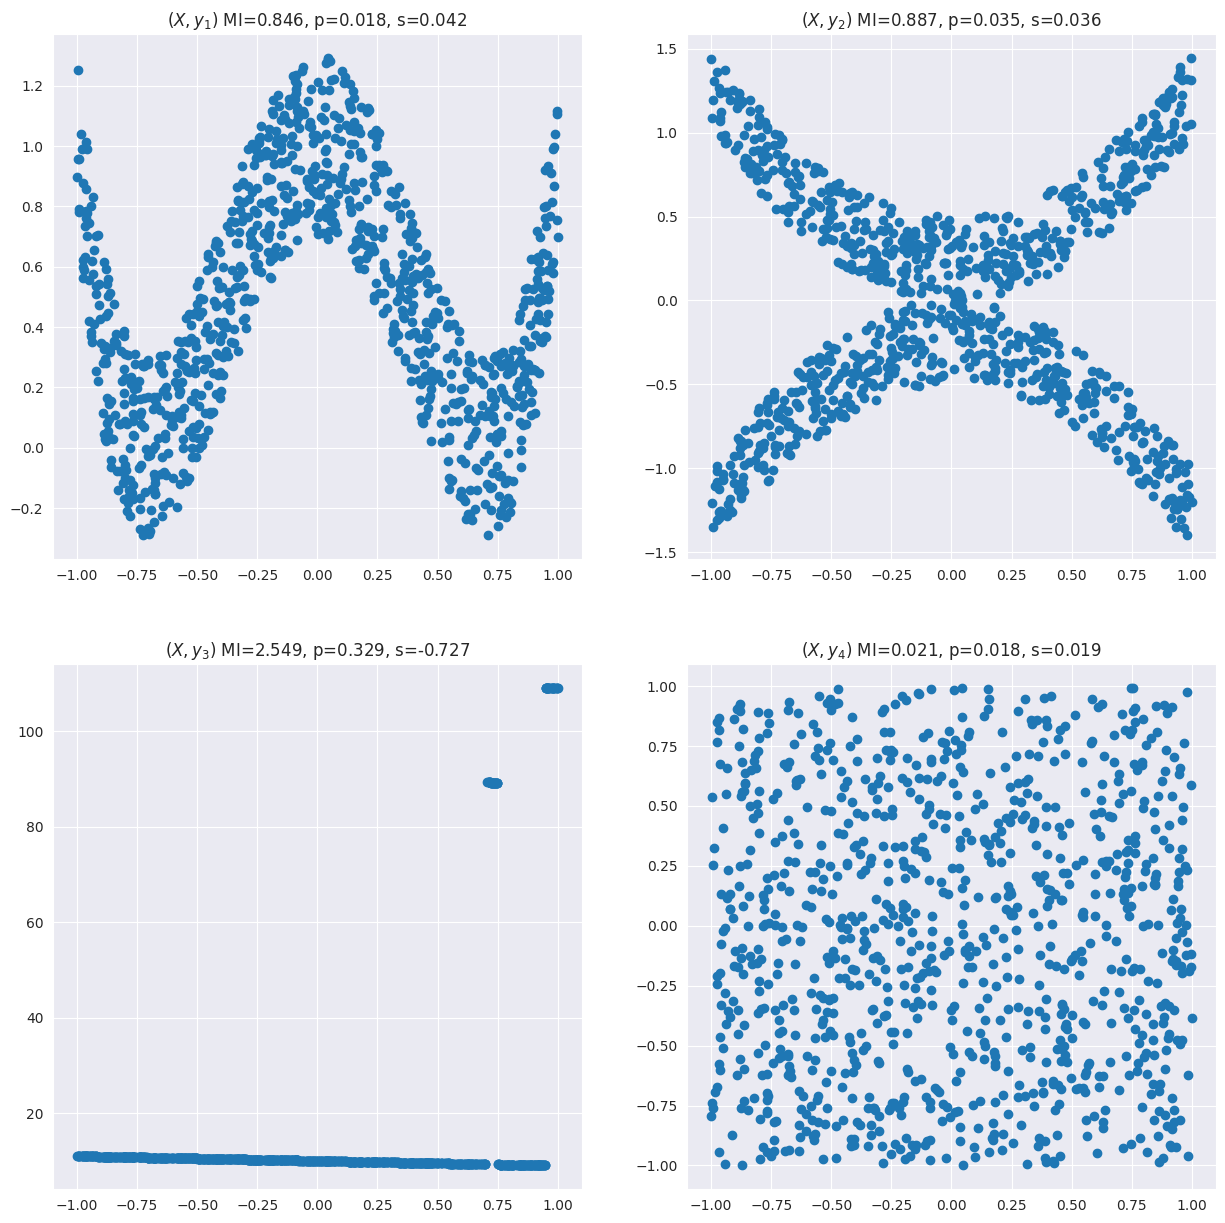

In [133]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for i, y in enumerate(df_dependency.columns[2:]):
    axs.ravel()[i].scatter(df_dependency['X'], df_dependency[y])
    p = pearsons(df_dependency['X'].to_numpy(), df_dependency[y].to_numpy())
    s = spearmen(df_dependency['X'].to_numpy(), df_dependency[y].to_numpy())
    axs.ravel()[i].set_title(f"$(X, {y[0]}_{y[-1]})$ MI={mutual_information[i]:1.3f}, p={p:1.3f}, s={s:1.3f}")

plt.show()

(6) Begründen Sie nun für jedes Datenreihenpaar, warum Sie Korrelationen oder keine Korrelation durch Pearson, Spearman und die Mutual Information angezeigt bekommen.

* Begründen Sie zusätzlich, warum Sie für Datenreihenpaar $(X, y_3)$ so unterschiedliche Ergebnisse für den Pearson- und den Spearman-Korrelationskoeffizienten erhalten haben.

- $(X, y_1)$: Keine Korrelation, denn obwohl ein Zusammenhang zwischen $X$ und $y_1$ besteht, ist dieser nicht monoton und die Symmetrie des Graphen führt dazu, dass die Korrelationskoeffizienten nahe 0 sind.
- $(X, y_2)$: Keine Korrelation, denn obwohl ein Zusammenhang zwischen $X$ und $y_1$ besteht, ist dieser nicht monoton und die Symmetrie des Graphen führt dazu, dass die Korrelationskoeffizienten nahe 0 sind.
- $(X, y_3)$: Die Datenpunkte liegen größtenteils auf einer Geraden mit einer sehr kleinen negativen Steigung. Durch die starken Ausreißer nach oben war der Wert des Pearson-Koeffizienten jedoch positiv und wies nur auf eine leichte Korrelation hin. Da der Spearman-Koeffizient robuster gegenüber Ausreißern ist, blieb hier sowohl das negative Vorzeichen als auch die Stärke der Korrelation erhalten.
- $(X, y_4)$: Keine Korrelation, da kein erkennbarer Zusammenhang zwischen der Verteilung von $X$ und $y_4$ vorliegt.